什么是机器学习？机器学习的一个重要的目标就是利用数学模型来理解数据，发现数据中的规律，用作数据的分析和预测。数据通常由一组向量组成，这组向量中的每个向量都是一个样本，我们用$x_i$来表示一个样本，其中$i=1,2,3,...,N$,共N个样本，每个样本$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)$共p+1个维度，前p个维度的每个维度我们称为一个特征，最后一个维度$y_i$我们称为因变量(响应变量)。特征用来描述影响因变量的因素，如：我们要探寻身高是否会影响体重的关系的时候，身高就是一个特征，体重就是一个因变量。通常在一个数据表dataframe里面，一行表示一个样本$x_i$，一列表示一个特征。      
根据数据是否有因变量，机器学习的任务可分为：**有监督学习**和**无监督学习**。
   - 有监督学习：给定某些特征去估计因变量，即因变量存在的时候，我们称这个机器学习任务为有监督学习。如：我们使用房间面积，房屋所在地区，环境等级等因素去预测某个地区的房价。          
   - 无监督学习：给定某些特征但不给定因变量，建模的目的是学习数据本身的结构和关系。如：我们给定某电商用户的基本信息和消费记录，通过观察数据中的哪些类型的用户彼此间的行为和属性类似，形成一个客群。注意，我们本身并不知道哪个用户属于哪个客群，即没有给定因变量。 

根据因变量的是否连续，有监督学习又分为**回归**和**分类**：
   - 回归：因变量是连续型变量，如：房价，体重等。
   - 分类：因变量是离散型变量，如：是否患癌症，西瓜是好瓜还是坏瓜等。

为了更好地叙述后面的内容，我们对数据的形式作出如下约定：      
第i个样本：$x_i=(x_{i1},x_{i2},...,x_{ip},y_i)^T,i=1,2,...,N$     
因变量$y=(y_1,y_2,...,y_N)^T$        
第k个特征:$x^{(k)}=(x_{1k},x_{2k},...,x_{Nk})^T$     
特征矩阵$X=(x_1,x_2,...,x_N)^T$

在学习机器学习中，我们经常使用scikit-learn简称sklearn工具库来探索机器学习项目，下面我们开始使用sklearn来演示这几个具体的概念：

# 1.1 回归
首先，我们先来看看有监督学习中回归的例子，我们使用sklearn内置数据集Boston房价数据集。sklearn中所有内置数据集都封装在datasets对象内： 返回的对象有：

    data:特征X的矩阵(ndarray)
    target:因变量的向量(ndarray)
    feature_names:特征名称(ndarray)

In [2]:
# 引入相关科学计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")      
import seaborn as sns

In [3]:
# 读取boston房价数据，price是因变量
from sklearn import datasets
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target            
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_data.info()
boston_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/home/googler/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


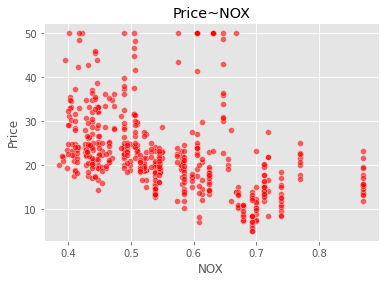

In [6]:
# 画出NOX：一氧化氮浓度(/千万分之一)对房价价格图 
sns.scatterplot(boston_data['NOX'],boston_data['Price'],color="r", alpha=0.6)
plt.title("Price~NOX")
plt.show()

# 1.2 分类
我们来看看一个分类的例子，我们来看看大名鼎鼎的iris数据集：

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
iris_data = pd.DataFrame(X,columns=features)
iris_data['target'] = y
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
iris_data.info()
iris_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


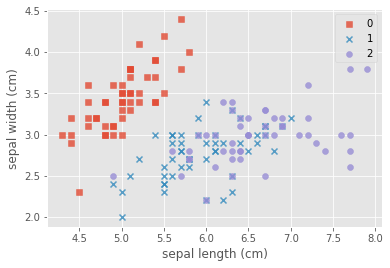

In [10]:
# 可视化特征 可以看出是个多分类
marker = ['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],y=iris_data.loc[y==c,"sepal width (cm)"],alpha=0.8,label=c,marker=marker[c])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

我们可以看到：每种不同的颜色和点的样式为一种类型的鸢尾花，数据集有三种不同类型的鸢尾花。因此因变量是一个类别变量，因此通过特征预测鸢尾花类别的问题是一个分类问题。

各个特征的相关解释：

    sepal length (cm)：花萼长度(厘米)
    sepal width (cm)：花萼宽度(厘米)
    petal length (cm)：花瓣长度(厘米)
    petal width (cm)：花瓣宽度(厘米)

# 1.3 无监督学习
我们可以使用sklearn生成符合自身需求的数据集，下面我们用其中几个函数例子来生成无因变量的数据集：
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

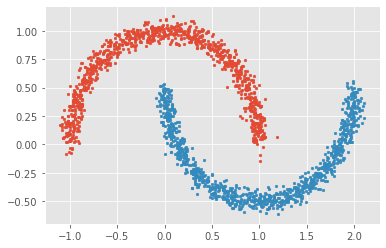

In [11]:
# 生成月牙型非凸集
from sklearn import datasets
x, y = datasets.make_moons(n_samples=2000, shuffle=True,
                  noise=0.05, random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=7)
plt.show()

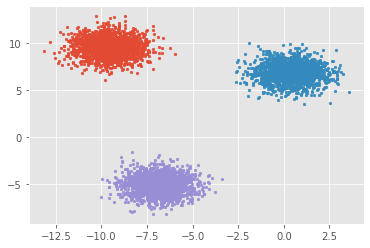

In [12]:
# 生成符合正态分布的聚类数据
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=3)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c, 0], x[y==c, 1],s=7)
plt.show()

# 2. 使用sklearn构建完整的机器学习项目流程

一般来说，一个完整的机器学习项目分为以下步骤：

    明确项目任务：回归/分类
    收集数据集并选择合适的特征。
    选择度量模型性能的指标。
    选择具体的模型并进行训练以优化模型。
    评估模型的性能并调参

# 2.1 使用sklearn构建完整的回归项目

(1) 收集数据集并选择合适的特征：
在数据集上我们使用我们比较熟悉的Boston房价数据集，原因是：

    第一个，我们通过这些简单的数据集快速让我们上手sklearn，以及掌握sklearn的相关操作。
    第二个，我们用简单的数据集能更加清晰地介绍机器学习的相关模型，避免在处理数据上花费较大的精力。


In [15]:
# 读取boston房价数据，price是因变量
from sklearn import datasets
boston = datasets.load_boston()     # 返回一个类似于字典的类
X = boston.data
y = boston.target
features = boston.feature_names
boston_data = pd.DataFrame(X,columns=features)
boston_data["Price"] = y
boston_data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
boston_data.info()
boston_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(2) 选择度量模型性能的指标：预测值：$\hat{y}$     真实值: y                       
   - MSE均方误差：$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
   - MAE平均绝对误差:$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$
   - $R^2$决定系数：$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
   - 解释方差得分:$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

![jupyter](./1.3.png)              
在这个案例中，我们使用MSE均方误差为模型的性能度量指标。

In [17]:
# MSE是真实值与预测值的差值的平方然后求和平均。
# 范围[0,+∞)，当预测值与真实值完全相同时为0，误差越大，该值越大。
import numpy as np
from sklearn import metrics
y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
y_pred = np.array([1.0, 4.5, 3.5, 5.0, 8.0, 4.5, 1.0])
print(metrics.mean_squared_error(y_true, y_pred)) # 8.107142857142858

8.107142857142858


In [18]:
# RMSE （均方根误差）（Root Mean Square Error）其实就是MSE加了个根号
y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
y_pred = np.array([1.0, 4.5, 3.5, 5.0, 8.0, 4.5, 1.0])
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

2.847304489713536


In [19]:
# MAE （平均绝对误差）（Mean Absolute Error）
y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
y_pred = np.array([1.0, 4.5, 3.5, 5.0, 8.0, 4.5, 1.0])
print(metrics.mean_absolute_error(y_true, y_pred))

1.9285714285714286


统计中的方差（样本方差）是各个数据分别与其平均数之差的平方的和的平均
简单的说：标准差等于方差开根号。